In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random
import numpy as np
import math
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2
random.seed(123)
np.random.seed(123)

,avg_rating,book_title,author_num_unique_books,book_reviews,genres_str,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,reviews_per_month,reviews_per_month_log
0,4.20,The Gifts of Imperfection,53.0,Ive read more than my fair share of self-help ...,audiobook health inspirational mental-health n...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,55.458333,4.015632
1,4.27,Daring Greatly,53.0,This book came highly recommended by seemingly...,audiobook business leadership non-fiction pare...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,91.406250,4.515314
2,3.89,The 4-Hour Workweek,25.0,A few weeks ago in NYC I sat with two of the ...,audiobook buisness business entrepreneurship f...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,42.134615,3.740870
3,3.91,The Artist's Way,78.0,On the whole the key to the Artists Way is se...,art inspirational non-fiction personal-develop...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.020833,2.082042
4,4.07,Mindset,32.0,For practical insights refer to: Growth Minds...,business education leadership non-fiction pare...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.761905,3.755648


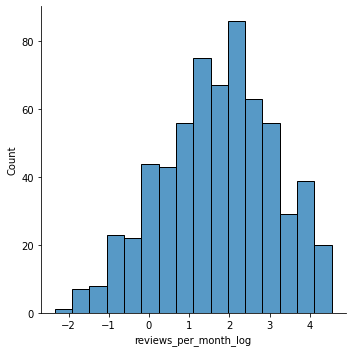

In [148]:
df1 = pd.read_csv('../data/books_25_pages_clean0_description_genres.csv',skipinitialspace=True)
df1 = df1.rename(columns = lambda x: x.strip())
df1['reviews_per_month_log'] = df1.apply(lambda x :math.log(x['reviews_per_month']),axis=1)
fig_temp = sns.displot(df1, x="reviews_per_month_log")
fig_temp.savefig("../data/eda_3.png")
df1.head()

In [149]:
# create training and testing dataframes
num_half = int(len(df1.index)/2)
print(num_half)
# df1['intercept'] = 1
df_train = df1.sample(frac=1).head(n=num_half)
df_validate = df1.sample(frac=1).tail(n=len(df1.index)-num_half)
df_validate.to_csv('../data/training.csv',index=False)
df_validate.to_csv('../data/validation.csv',index=False)
df_validate.sort_values(by=['reviews_per_month','author_num_unique_books'],ascending=True)[['book_title','author_num_unique_books','reviews_per_month']].head(n=3)
# df_validate(by=['p-val'],ascending=True)

319


,book_title,author_num_unique_books,reviews_per_month
597,The Relaxation & Stress Reduction Workbook,44.0,0.095833
441,Healing Your Emotional Self,25.0,0.154762
531,Take Time for Your Life,47.0,0.189394


In [150]:
features = [] #'author_num_unique_books','avg_rating'
for coli in df_train.columns:
    if "topic" in coli: features.append(coli)

len(features)
# for i in range(0,len(list(df1.columns))):
#     print(i,list(df1.columns)[i])


10

<AxesSubplot:>

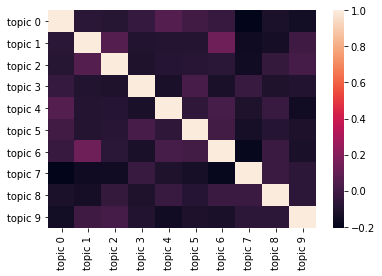

In [151]:

sns.heatmap(df_train[features].corr(), annot=False)


In [152]:
# # build linear regression model
y_str = 'reviews_per_month_log'
# features.append('intercept')
X_train = df_train[features]
y_train = df_train[y_str]
X_validate = df_validate[features]
y_validate = df_validate[y_str]
# regr = LinearRegression()
# regr.fit(X_train, y_train)
# y_pred_validate = regr.predict(X_validate)
# regr.score(X_train, y_train)
# # print('rmse validation',math.sqrt(mean_squared_error(y_validate, y_pred_validate)))
# # print('rsq validation',r2_score(y_validate, y_pred_validate))
# # print('rmse training',math.sqrt(mean_squared_error(y_train, regr.predict(X_train))))
# # print('rsq training',r2_score(y_train, regr.predict(X_train)))

In [153]:
# plt.scatter(y_validate,y_pred_validate,  color='black')
# # plt.plot(X_validate, y_pred_validate, color='blue', linewidth=3)
# plt.plot(sorted(y_validate,key=float), sorted(y_validate,key=float),'--', linewidth=1,color='red')
# # plt.xticks(())
# # plt.yticks(())

# plt.show()


In [154]:
# regr.intercept_
# regr.coef_

In [155]:
# exog = sm.add_constant(X_train)
# ols = sm.OLS(y_train,exog)
ols = sm.OLS(y_train,X_train)
ols_result = ols.fit()
ols_result.save("../data/ols.pickle")

ols_result.summary()

# predict = ols_result.predict(X_train)
# from statsmodels.graphics.regressionplots import plot_leverage_resid2
# fig, ax = plt.subplots(figsize=(8,6))
# fig = plot_leverage_resid2(ols_result, ax = ax)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     reviews_per_month_log   R-squared (uncentered):                   0.548
Model:                               OLS   Adj. R-squared (uncentered):              0.534
Method:                    Least Squares   F-statistic:                              37.50
Date:                   Tue, 06 Oct 2020   Prob (F-statistic):                    1.13e-47
Time:                           18:09:36   Log-Likelihood:                         -580.61
No. Observations:                    319   AIC:                                      1181.
Df Residuals:                        309   BIC:                                      1219.
Df Model:                             10                                                  
Covariance Type:               nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
topic 0        0.5412      0.227      2.383      0.018       0.094       0.988
topic 1        0.9810      0.237      4.137      0.000       0.514       1.448
topic 2        0.7838      0.323      2.429      0.016       0.149       1.419
topic 3        0.6604      0.199      3.321      0.001       0.269       1.052
topic 4        1.3055      0.299      4.368      0.000       0.717       1.894
topic 5        1.2834      0.234      5.477      0.000       0.822       1.744
topic 6        0.5663      0.250      2.262      0.024       0.074       1.059
topic 7        1.6366      0.186      8.791      0.000       1.270       2.003
topic 8        1.0753      0.235      4.568      0.000       0.612       1.538
topic 9        0.8680      0.197      4.396      0.000       0.480       1.257
==============================================================================
Omnibus:                        5.528   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.448
Skew:                          -0.284   Prob(JB):                       0.0656
Kurtosis:                       2.703   Cond. No.                         2.16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
df_coeff = pd.DataFrame() #.reset_index()
df_coeff['coefficient'] = ols_result.params
df_coeff['p-val'] = ols_result.pvalues
df_coeff['conf_int_low'] = ols_result.conf_int()[0].values
df_coeff['conf_int_high'] = ols_result.conf_int()[1].values
df_coeff = df_coeff.reset_index()
df_coeff['index'] = [i for i in range(0,len(df_coeff.index))]
df_coeff = df_coeff.rename(columns={'index':'topic'})
df_coeff['topic_name'] = ['human problem','relationship family','women','story inspiration','brain study','happy positive','emotion step', 'success business', 'habit goal', 'advice job']

df_coeff.sort_values(by=['p-val'],ascending=True)

,topic,coefficient,p-val,conf_int_low,conf_int_high,topic_name
7,7,1.636593,1.055288e-16,1.270266,2.002920,success business
5,5,1.283439,8.958098e-08,0.822380,1.744498,happy positive
8,8,1.075283,7.134816e-06,0.612068,1.538499,habit goal
9,9,0.868031,1.517501e-05,0.479507,1.256556,advice job
4,4,1.305450,1.714351e-05,0.717364,1.893536,brain study
1,1,0.981021,4.547668e-05,0.514379,1.447663,relationship family
3,3,0.660404,1.004394e-03,0.269121,1.051686,story inspiration
2,2,0.783836,1.572994e-02,0.148751,1.418921,women
0,0,0.541216,1.777058e-02,0.094351,0.988082,human problem
6,6,0.566250,2.439406e-02,0.073672,1.058828,emotion step


In [157]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,1.1,topic 0
1,1.1,topic 1
2,1.0,topic 2
3,1.1,topic 3
4,1.0,topic 4
5,1.1,topic 5
6,1.1,topic 6
7,1.1,topic 7
8,1.1,topic 8
9,1.1,topic 9


rmse validation 1.5742304953294357
rsq validation -0.276022036046236
rmse training 1.4935504811415503
rsq training -0.25861060868951413


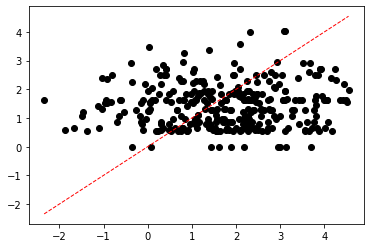

In [158]:
ynewpred =  ols_result.predict(X_validate) # predict out of sample
fig, ax = plt.subplots()
# ax.plot(x1, y, 'o', label="Data")
# ax.plot(x1, y_true, 'b-', label="True")


plt.scatter(y_validate, ynewpred,  color='black')
# plt.plot(X_validate, y_pred_validate, color='blue', linewidth=3)
plt.plot(sorted(y_validate,key=float), sorted(y_validate,key=float),'--', linewidth=1,color='red')
# plt.xticks(())
# plt.yticks(())
print('rmse validation',math.sqrt(mean_squared_error(y_validate, ynewpred)))
print('rsq validation',r2_score(y_validate, ynewpred))
print('rmse training',math.sqrt(mean_squared_error(y_train, ols_result.predict(X_train))))
print('rsq training',r2_score(y_train, ols_result.predict(X_train)))

plt.show()

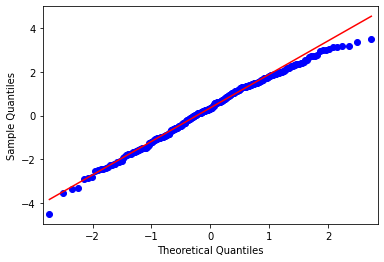

In [159]:
### quality of linear model
res = ols_result.resid 
fig = sm.qqplot(res,line="q")

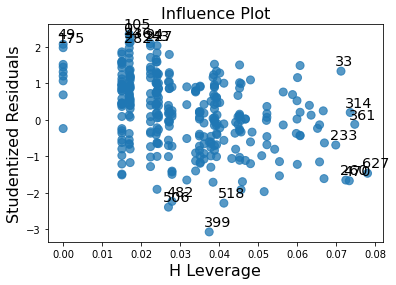

In [160]:
# fig, ax = plt.subplots(figsize=(8,6))
# plot_leverage_resid2(ols_result, ax = ax)
influence_plot = sm.graphics.influence_plot(ols_result, size=8)

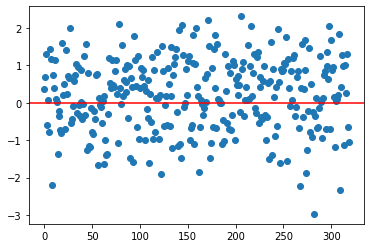

In [161]:
# residuals
plt.plot(ols_result.resid_pearson, 'o', ls = 'None')
plt.axhline(y=0, color = 'r')
# plt.scatter(x=ols_result.fittedvalues,y=ols_result.resid)

In [162]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from num2words import num2words
import nltk
nltk.download('punkt')
def convert_lower_case(data):
    return np.char.lower(data)
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text
def remove_obvious(data):
    return_data = str(data).replace("book","").replace("self","").replace("help","").replace("author","").replace("peopl","person").replace("bestsel","").replace("reader","")
    return return_data 

def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    data = remove_obvious(data)
    return data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\valer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [163]:
import pickle
filename_model = '../data/topic_model_tfidf_nmf.pickle'
nmf_model = pickle.load(open(filename_model, 'rb'))
filename_model = '../data/topic_model_tfidf.pickle'
tfidf_model = pickle.load(open(filename_model, 'rb'))

In [164]:
# import top words from topic model and merge with output of linear regression model
df_top_words = pd.read_csv('../data/books_25_pages_author_info_description_genres_topics_top_words.csv',skipinitialspace=True)
df_top_words = df_top_words.rename(columns = lambda x: x.strip())
df_coeff_topics = df_coeff.merge(df_top_words)
df_coeff_topics.to_csv('../data/books_25_pages_author_info_description_genres_topics_top_words_ols_coeff.csv',index=False)
df_coeff_topics.sort_values(by=['p-val'],ascending=True)

,topic,coefficient,p-val,conf_int_low,conf_int_high,topic_name,top_words
7,7,1.636593,1.055288e-16,1.270266,2.002920,success business,success goal business create positive inspire
5,5,1.283439,8.958098e-08,0.822380,1.744498,happy positive,happy positive inspire present happen reason
8,8,1.075283,7.134816e-06,0.612068,1.538499,habit goal,habit step goal effect problem inform
9,9,0.868031,1.517501e-05,0.479507,1.256556,advice job,advice job business listen step inform family
4,4,1.305450,1.714351e-05,0.717364,1.893536,brain study,brain study inform effect fact
1,1,0.981021,4.547668e-05,0.514379,1.447663,relationship family,relationship family problem
3,3,0.660404,1.004394e-03,0.269121,1.051686,story inspiration,story inspire family happen real listen
2,2,0.783836,1.572994e-02,0.148751,1.418921,women,women
0,0,0.541216,1.777058e-02,0.094351,0.988082,human problem,human problem question study present effect re...
6,6,0.566250,2.439406e-02,0.073672,1.058828,emotion step,emotion step present listen positive effect


In [165]:
title_1 = 'Thinking, Fast and Slow'
# description_1 = ' we think. System 1 is fast, intuitive, and emotional; System 2 is slower, more deliberative, and more logical. Kahneman exposes the extraordinary capabilities—and also the faults and biases—of fast thinking, and reveals the pervasive influence of intuitive impressions on our thoughts and behavior. The impact of loss aversion and overconfidence on corporate strategies, the difficulties of predicting what will make us happy in the future, the challenges of properly framing risks at work and at home, the profound effect of cognitive biases on everything from playing the stock market to planning the next vacation—each of these can be understood only by knowing how the two systems work together to shape our judgments and decisions.Engaging the reader in a lively conversation about how we think, Kahneman reveals where we can and cannot trust our intuitions and how we can tap into the benefits of slow thinking. He offers practical and enlightening insights into how choices are made in both our business and our personal lives—and how we can use different techniques to guard against the mental glitches that often get us into trouble. Thinking, Fast and Slow will transform the way you think about thinking'
# keywords_1 = 'nonfiction, psychology, science, business, economics, self help, philosofy, audiobook'
# title_1 = 'The Life-Changing Magic of Tidying Up: The Japanese Art of Decluttering and Organizing'
# description_1 = 'Despite constant efforts to declutter your home, do papers still accumulate like snowdrifts and clothes pile up like a tangled mess of noodles? Japanese cleaning consultant Marie Kondo takes tidying to a whole new level, promising that if you properly simplify and organize your home once, youll never have to do it again. Most methods advocate a room-by-room or little-by-little approach, which doom you to pick away at your piles of stuff forever. The KonMari Method, with its revolutionary category-by-category system, leads to lasting results. In fact, none of Kondos clients have lapsed (and she still has a three-month waiting list) With detailed guidance for determining which items in your house spark joy (and which dont), this international best seller featuring Tokyos newest lifestyle phenomenon will help you clear your clutter and enjoy the unique magic of a tidy home - and the calm, motivated mindset it can inspire'
# keywords_1 = ''
# title_1 = 'The Power of Now: A Guide to Spiritual Enlightenment'
# description_1 = 'Eckhart Tolles message is simple: living in the now is the truest path to happiness and enlightenment. And while this message may not seem stunningly original or fresh, Tolles clear writing, supportive voice and enthusiasm make this an excellent manual for anyone whos ever wondered what exactly living in the now means. Foremost, Tolle is a world-class teacher, able to explain complicated concepts in concrete language. More importantly, within a chapter of reading this book, readers are already holding the world in a different container--more conscious of how thoughts and emotions get in the way of their ability to live in genuine peace and happiness. Tolle packs a lot of information and inspirational ideas into The Power of Now. (Topics include the source of Chi, enlightened relationships, creative use of the mind, impermanence and the cycle of life.) Thankfully, hes added markers that symbolise break time. This is when readers should close the book and mull over what they just read. As a result, The Power of Now reads like the highly acclaimed A Course in Miracles--a spiritual guidebook that has the potential to inspire just as many study groups and change just as many lives for the better. --Gail Hudson'
# keywords_1 = ''
# title_1 = ''
# description_1 = ''
# keywords_1 = 'self help, autism, motivational, money'
description_1 = 'Broken Open: How Difficult Times Can Help Us Grow In the more than twenty-five years since she co-founded Omega Institute - now the worlds largest center for spiritual retreat and personal growth -Elizabeth Lesser has been an intimate witness to the ways in which people weather change and transition. In a beautifully crafted blend of moving stories, humorous insights, practical guidance, and personal memoir, she offers tools to help us make the choice we all face in times of challenge: Will we be broken down and defeated, or broken open and transformed? Lesser shares tales of ordinary people who have risen from the ashes of illness, divorce, loss of a job or a loved one - stronger, wiser, and more in touch with their purpose and passion. And she draws on the worlds great spiritual and psychological traditions to support us as we too learn to break open and blossom into who we were meant to be.'

input_text = title_1+' '+description_1 #+ ' ' + keywords_1
processed_input_text = preprocess(input_text)
processed_input_text

' think fast slow broken open difficult time  us grow twenti five year sinc co found omega institut world largest center spiritu retreat person growth elizabeth lesser intim wit way person weather chang transit beauti craft blend move stori humor insight practic guidanc person memoir offer tool  us make choic face time challeng broken defeat broken open transform lesser share tale ordinari person risen ash ill divorc loss job love one stronger wiser touch purpo passion draw world great spiritu psycholog tradit support us learn break open blossom meant'

In [166]:
# transform text to features for linear regression
num_topics = 10
X_tfidf = tfidf_model.transform([processed_input_text])
X_nmf = nmf_model.transform(X_tfidf)
df_x_nmf = pd.DataFrame(X_nmf,columns = ['topic_'+str(i) for i in range(0,num_topics)]) 
df_x_nmf

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.0,0.0,0.0,0.192823,0.0,0.0,0.0,0.0,0.0,0.081815


In [167]:
# convert into useful dataframe
df_x_nmf_tp = df_x_nmf.transpose().reset_index()
df_x_nmf_tp = df_x_nmf_tp.rename(columns={'index':'topic',0:'probability'})
df_x_nmf_tp['topic'] = list(range(0,len(df_x_nmf_tp['topic'].values)))
df_x_nmf_tp

,topic,probability
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.192823
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,8,0.000000
9,9,0.081815


In [168]:
# probability cutoff for topic model
cutoff_prob = 0.15
topics_list = df_x_nmf_tp[df_x_nmf_tp['probability'] > cutoff_prob]['topic'].values
df_x_nmf_tp[df_x_nmf_tp['probability'] > cutoff_prob]

,topic,probability
3,3,0.192823


In [169]:
#words of topics that have probability > cutoff_prob
df_topics_high_prob = df_coeff_topics[df_coeff_topics['topic'].isin(topics_list)]
df_topics_high_prob

,topic,coefficient,p-val,conf_int_low,conf_int_high,topic_name,top_words
3,3,0.660404,0.001004,0.269121,1.051686,story inspiration,story inspire family happen real listen


In [170]:
# output top words
significance_cutoff = 0.05
df_topics_high_prob[df_topics_high_prob['p-val']<significance_cutoff]

,topic,coefficient,p-val,conf_int_low,conf_int_high,topic_name,top_words
3,3,0.660404,0.001004,0.269121,1.051686,story inspiration,story inspire family happen real listen
